In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
COLOR = '#bbccd5'
BG = '#23272a'
# print(mpl.rcParams.keys()) # see all params
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['figure.facecolor'] = BG
mpl.rcParams['figure.figsize'] = [16, 9]

## Helper Functions

In [2]:
def get_img(name, loc='imgs'):
    location = os.path.join(loc, name)
    img = plt.imread(location)
    if img.dtype == 'uint8':
        img = img.astype(np.float64) / 255
    return img

def scale_values(img):
    norm = (img - np.min(img)) 
    return norm / max(np.max(norm), 0.1)

def to_greyscale(img):
    if img.dtype == 'uint8':
        img = img / 256
    new_img = img[:,:,:3] # rgba -> rgb
    return np.repeat(np.mean(new_img, axis=2)[:, :, np.newaxis], 3, axis=2)

def side_by_side(img_a, img_b):
    size = 10
    ratio = img_a.shape[0] / img_a.shape[1]
    fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(2 * size, size * ratio))
    
    axs[0].imshow(img_a)
    axs[1].imshow(img_b)

## Some examples

Images are stored in imgs/examples number to match the image where a is for after and b is for before. So 1b and 1a are the same location before and after respectively.

source of example images: https://www.lemonde.fr/en/les-decodeurs/article/2022/07/22/before-and-after-satellite-images-of-the-massive-fires-in-gironde-france_5991052_8.html

In [3]:
def compare(before, after):
    diff = after - before # get the difference
    
    # I try to perform some filtering by removing non white colors (as smoke is mostly white/grey)
    ranges = diff.max(axis=2) - diff.min(axis=2)
    ranges = np.repeat(ranges[:,:,np.newaxis], 3, axis=2)
    diff = diff * (ranges < 0.1) * (to_greyscale(diff) > 0.1)
    
    diff = scale_values(diff) # scale the values to make it easier to see
    
    return diff
    
def plot_trio(before, after, diff):
    fig = plt.figure(figsize=(16,12))
    fig.tight_layout()
    
    plt.subplot(2, 1, 1)
    plt.title('Difference')
    plt.imshow(diff)

    plt.subplot(2, 2, 3)
    plt.title('Before')
    plt.imshow(before)

    plt.subplot(2, 2, 4)
    plt.title('After')
    plt.imshow(after)

In [4]:
examples = []
for i in range(1, 1000):
    try:
        pair = []
        for version in 'ba':
            pair.append(get_img(os.path.join('examples', f'{i}{version}.jpg')))
        examples.append(pair)
    except FileNotFoundError:
        print(f'found {i - 1} images')
        break

found 4 images


In [5]:
for i, example in enumerate(examples):
    diff = compare(*example)
    examples[i].append(diff)

## Comparison Plots (you can colapse this section)

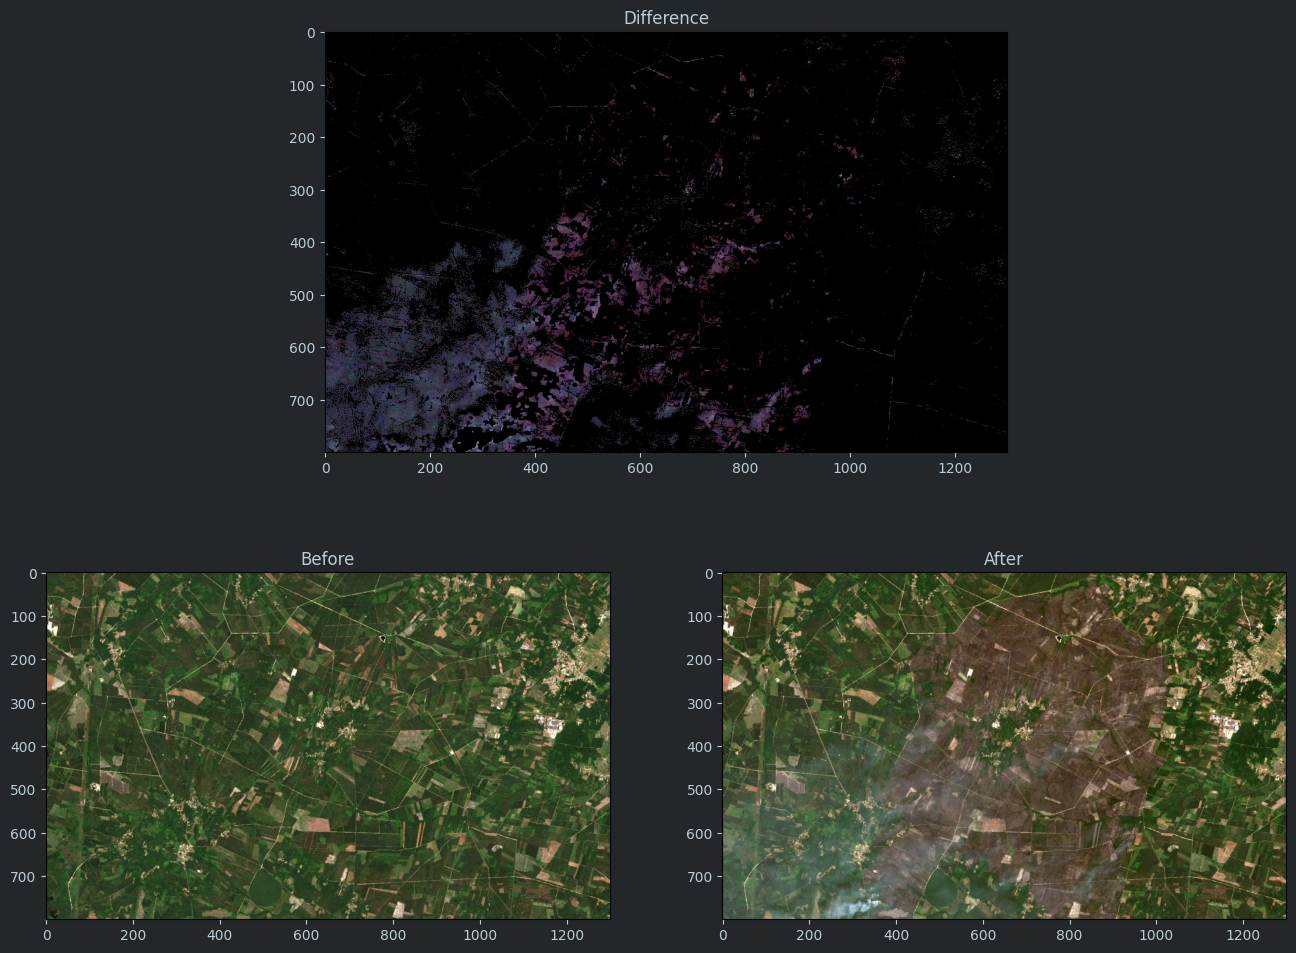

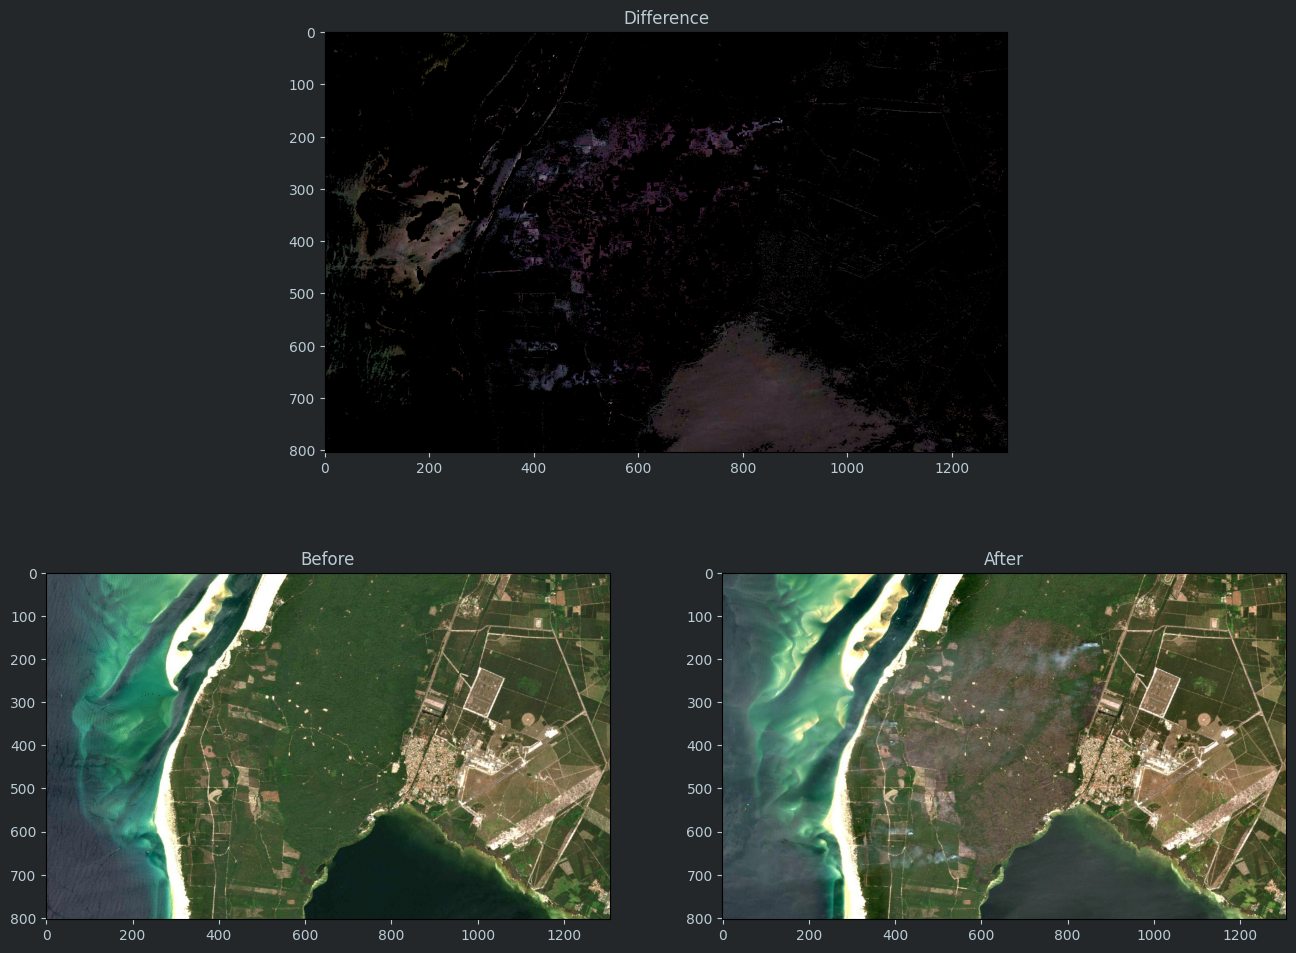

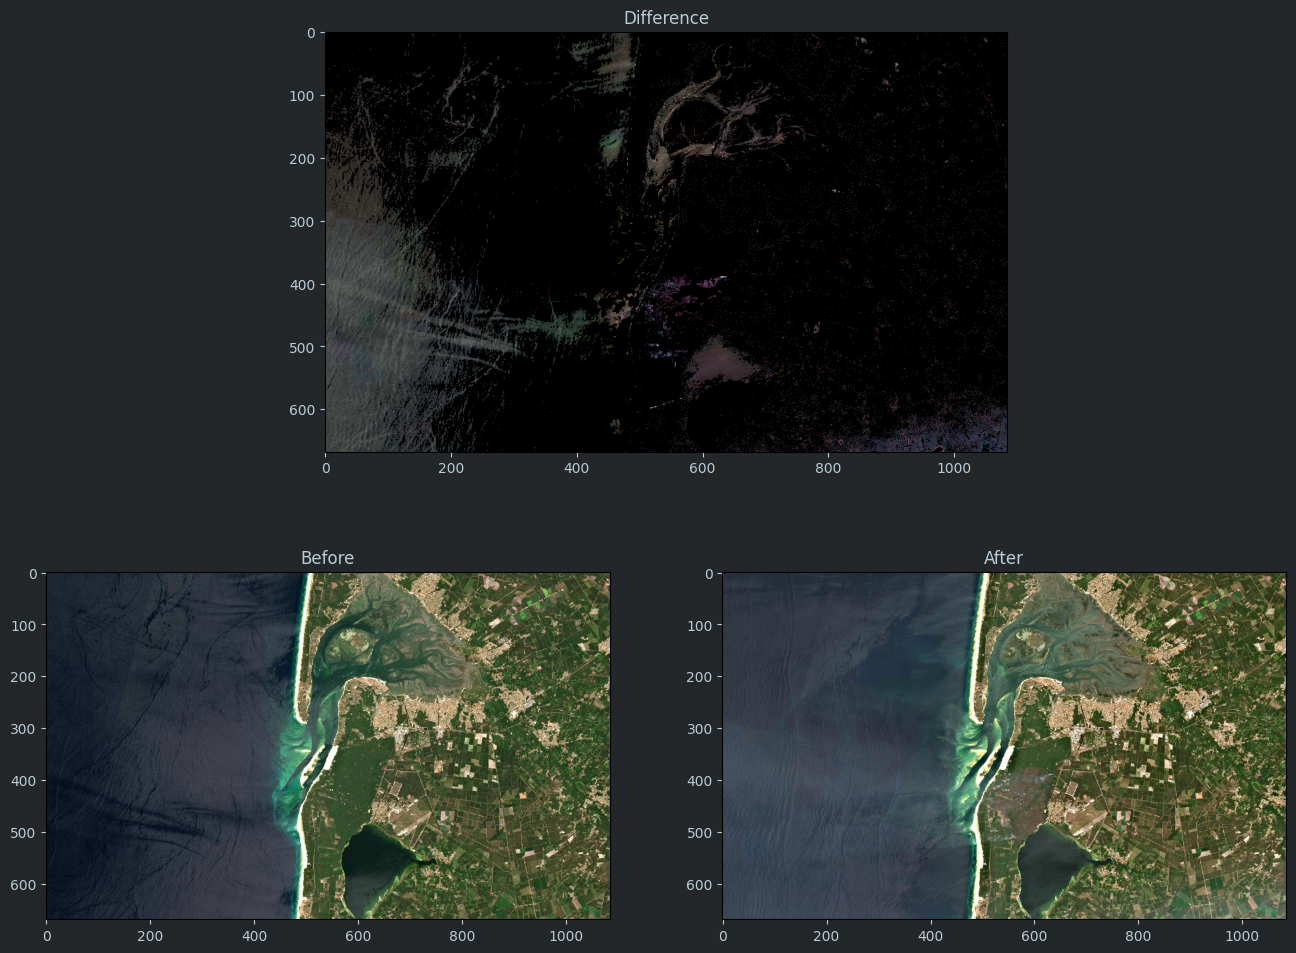

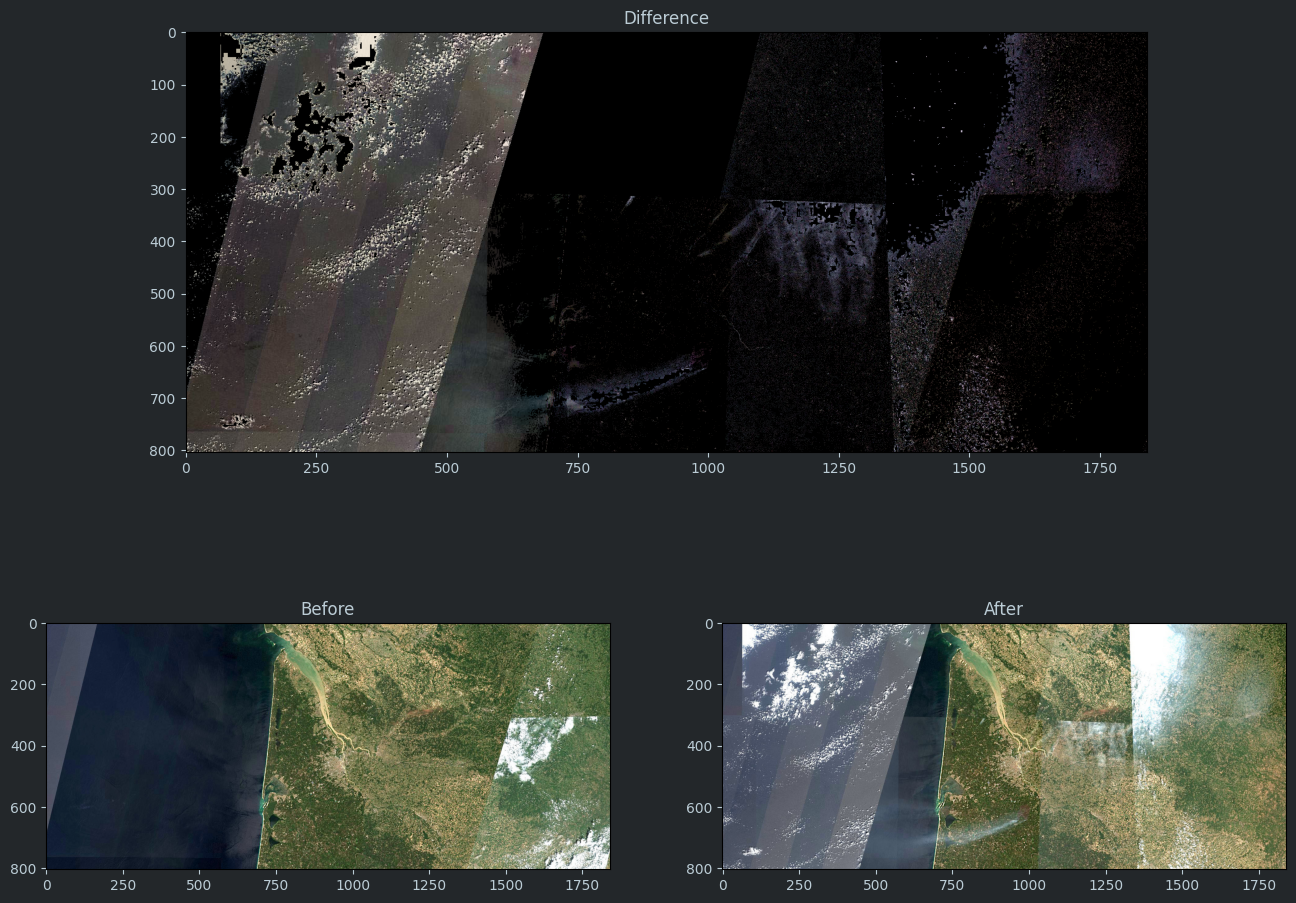

In [6]:
for example in examples:
    plot_trio(*example)

## Fire generation

Looking at this specific example I can identify 3 clear patterns of a fire.
1. We have a bright source
2. A dense smoke trail near the source
3. A more spread out smoke plume of smoke further out

From this we can consider some key parameters we would want to have for each:
1. For all
    1. Size
    2. Brightness
2. Source
    1. Shape (e.g. stretched oval and its orientation)
3. Smoke Trail
    1. Width in degrees as it spreads in a sector pattern see below ( or in other terms wind strength) 
    2. Wind direction
4. Other smoke
    1. I see it as potentially perlin noise and hence its relevant settings possibly translated to more meaningful smoke terms
    2. 1 and 2 from Smoke Trail

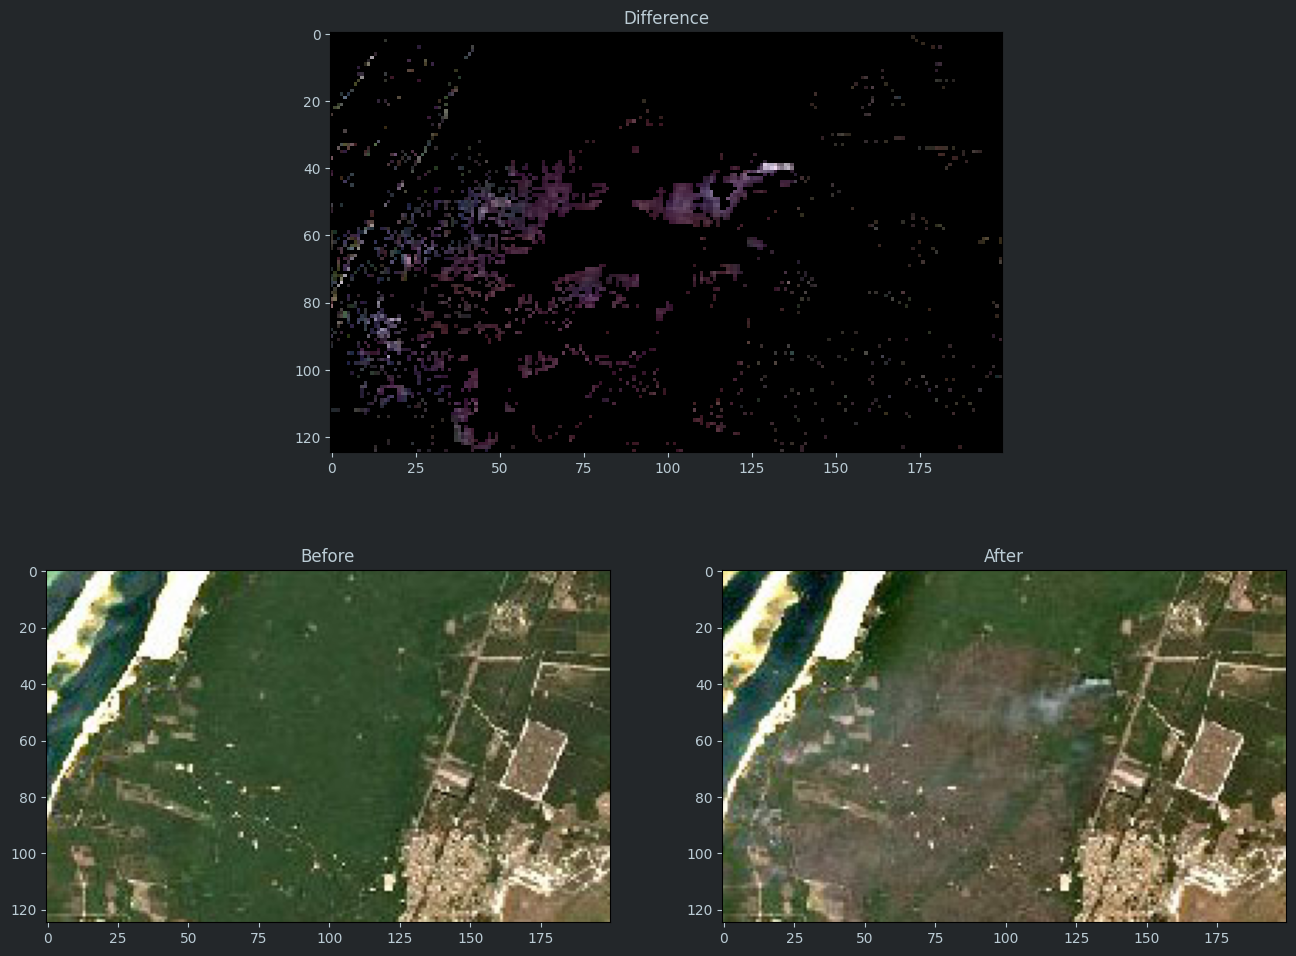

In [7]:
# looking at an example closer up
crop =[img[350:475, 500:700] for img in examples[2]]
plot_trio(*crop)

In [8]:
img = examples[2][0][350:475, 500:700]

In [9]:
def generate_source(img, position, size, brightness, shape):
    source = np.zeros_like(img)
    
    # TODO
    
    return source


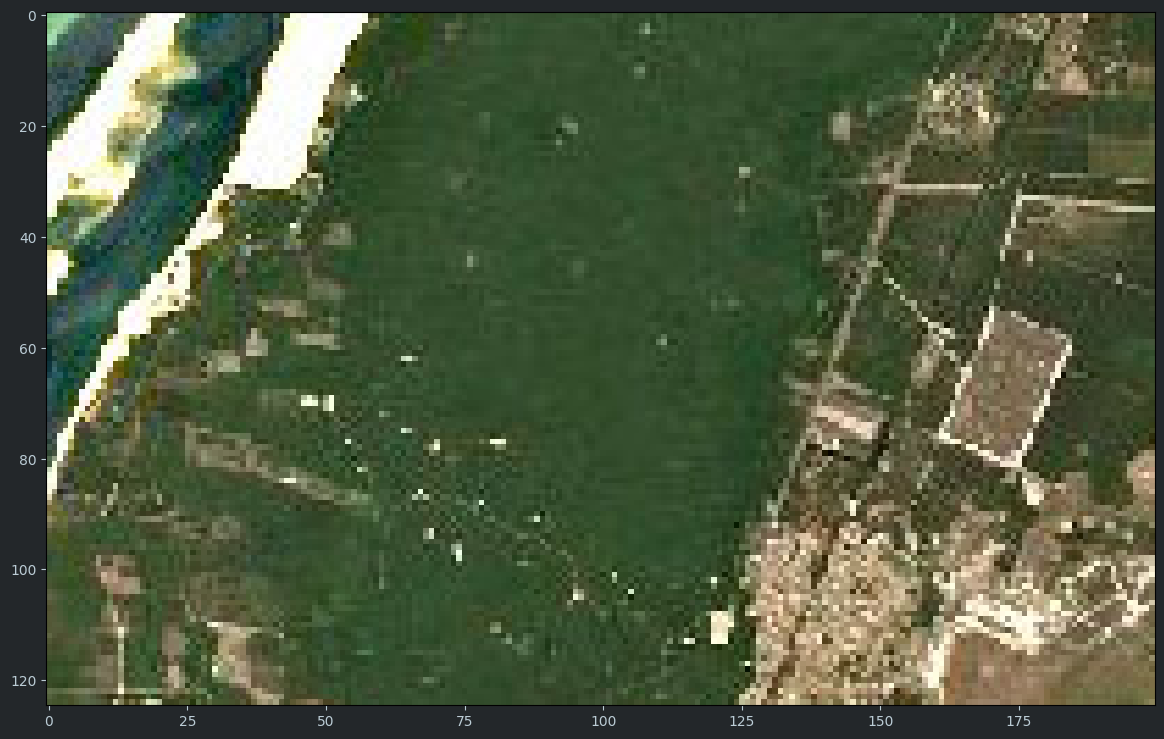

In [10]:
source = generate_source(img, (40, 125), 7, 0.7, 2/7)
plt.imshow(img + source)

In [11]:
def generate_trail(img, position, brightness, width, direction):
    source = np.zeros_like(img)
    
    # TODO
    
    return source


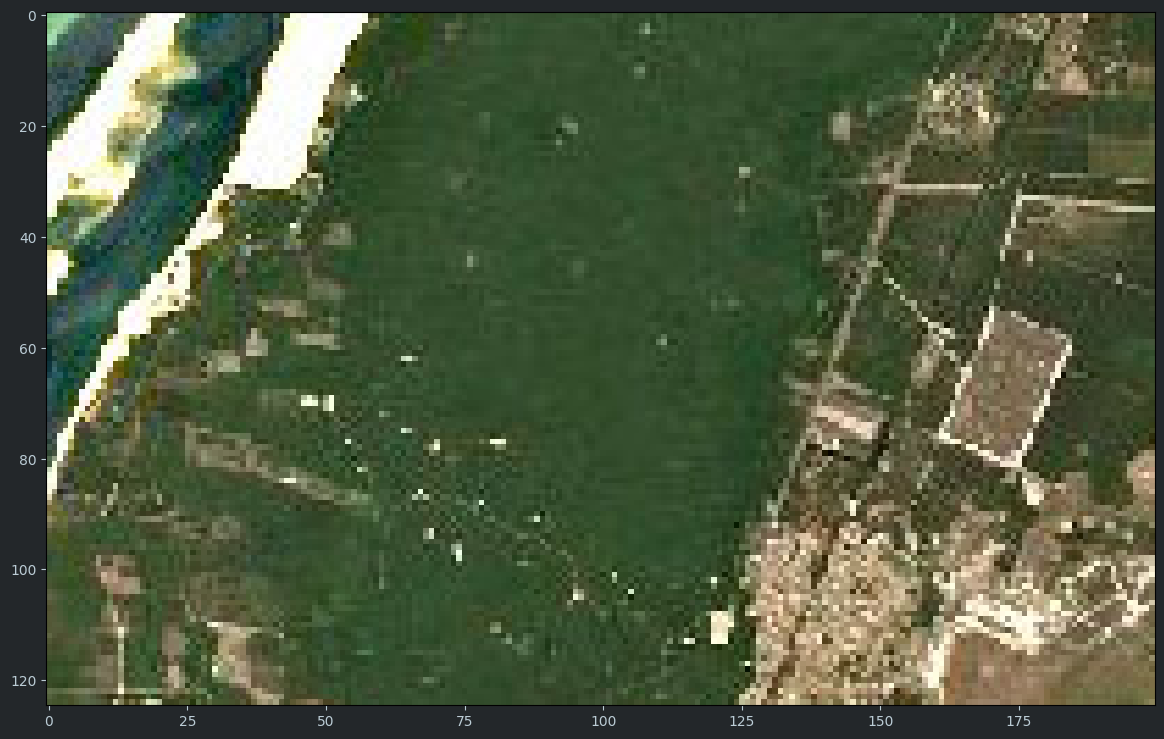

In [12]:
trail = generate_source(img, (40, 125), 0.5, np.deg2rad(15), np.deg2rad(250))
plt.imshow(img + trail)

In [13]:
def generate_plume(img, position, brightness, width, direction):
    source = np.zeros_like(img)
    
    # TODO
    
    return source


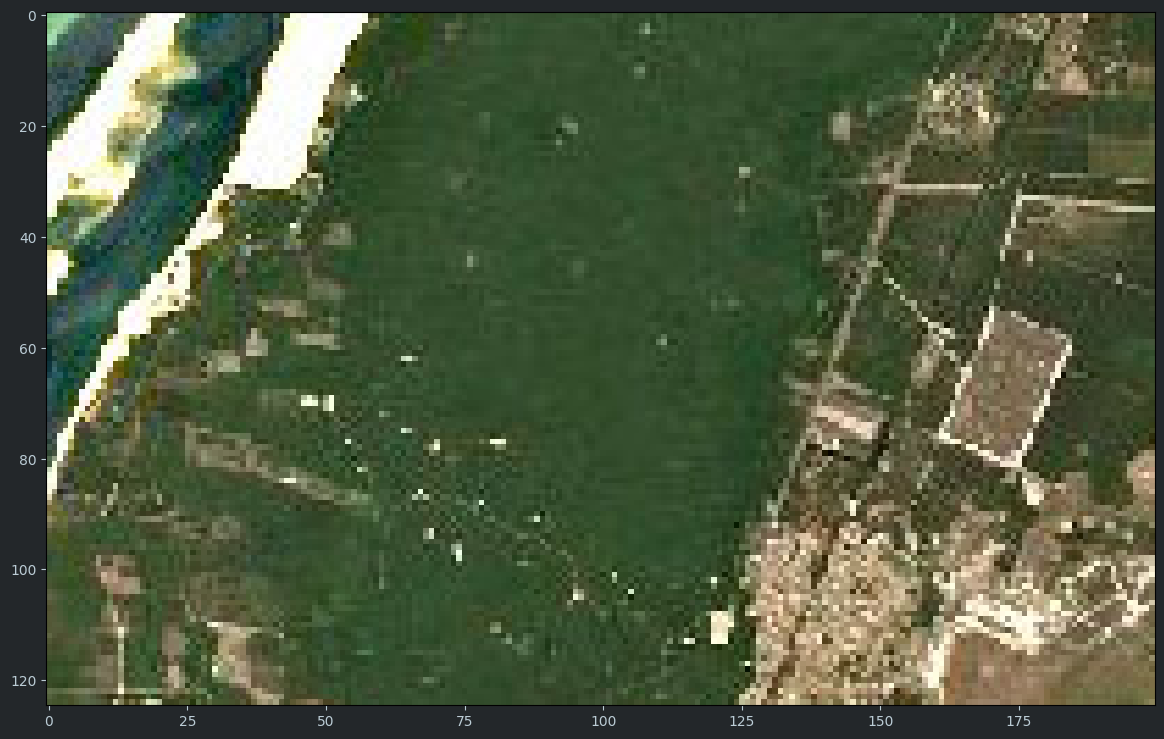

In [14]:
plume = generate_source(img, (40, 125), 0.2, np.deg2rad(30), np.deg2rad(250))
plt.imshow(img + plume)